In [9]:
# %%capture
# !pip install --upgrade pymupdf
# !pip install nltk
# !pip install networkx
# !pip install matplotlib
# !pip install Sastrawi

In [10]:
# Import semua library
import pymupdf
import nltk
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\willy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\willy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
doc = pymupdf.open("data/jurnal.pdf") # open a document
out = open("output.txt", "wb") # create a text output
for page in doc: # iterate the document pages
    text = page.get_text().encode("utf8") # get plain text (is in UTF-8)
    out.write(text) # write text of page
    out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
out.close()

In [12]:
with open('output.txt', 'r', encoding='utf-8') as file:
    teks = file.read()

print(teks[:200])  # tampilkan 200 karakter pertama

Jurnal Farmasi IKIFA 
Vol. 3 No. 3 Oktober 2024 
 
 
Ida, dkk | 121  
 
HUBUNGAN KARAKTERISTIK DEMOGRAFI DENGAN PENGETAHUAN 
MASYARAKAT TENTANG HIV/AIDS  DI RW 02  KELURAHAN PINANG RANTI 
JAKARTA-TIMU


In [13]:
sentences = nltk.sent_tokenize(teks)
print(sentences)

['Jurnal Farmasi IKIFA \nVol.', '3 No.', '3 Oktober 2024 \n \n \nIda, dkk | 121  \n \nHUBUNGAN KARAKTERISTIK DEMOGRAFI DENGAN PENGETAHUAN \nMASYARAKAT TENTANG HIV/AIDS  DI RW 02  KELURAHAN PINANG RANTI \nJAKARTA-TIMUR \n \nIda Diana Sari1, Nina Rustiana2, Aulia Eka Damayanti3 \n1,2,3Program Studi Farmasi, Sekolah Tinggi Ilmu Kesehatan IKIFA \nEmail : idadiana@ikifa.ac.id \nEmail: ninarustiana@ikifa.ac.id \nEmail: auliaeka.9b@gmail.com \n \nABSTRAK \nHuman Immunodeficiency Virus (HIV) yaitu virus yang menyerang dan melemahkan sistem \npertahanan tubuh manusia, sehingga tubuh mudah tertular berbagai penyakit.', 'Pada akhir tahun \n2022 sebanyak 85,6 juta orang telah terinfeksi virus HIV dan sekitar 40,4 juta orang meninggal \nkarena HIV.', 'Prevalensi orang hidup dengan HIV secara global sebanyak 39,0 juta.', 'Menurut \nLaporan Eksekutif Perkembangan HIV/AIDS dan Penyakit Menular Seksual (PIMS) Triwulan I \ntahun 2023, tercatat 5 Provinsi yang melaporkan kasus HIV tertinggi di Indonesia 

In [14]:
df = pd.DataFrame(sentences, columns=['kalimat'])
print(df)

                                               kalimat
0                          Jurnal Farmasi IKIFA \nVol.
1                                                3 No.
2    3 Oktober 2024 \n \n \nIda, dkk | 121  \n \nHU...
3    Pada akhir tahun \n2022 sebanyak 85,6 juta ora...
4    Prevalensi orang hidup dengan HIV secara globa...
..                                                 ...
214                 ADIL Indonesia Journal, 2019, 1.1.
215                                                18.
216  Menghilangkan Stigma Pasien HIV/AIDS - FK-KMK ...
217                               [cited 2024 Juli 6].
218  Available from:  https://fkkmk.ugm.ac.id/mengh...

[219 rows x 1 columns]


In [15]:
df.to_csv('kalimat.csv', index=False, encoding='utf-8')

Untuk membuat word graph

Lanjutkan dengan menggunakan https://www.geeksforgeeks.org/nlp/co-occurence-matrix-in-nlp/

In [16]:
# Baca teks dari paper PDF (output.txt yang sudah diextract sebelumnya)
with open('output.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Preprocess the text - menggunakan stopwords Sastrawi (Bahasa Indonesia)
factory = StopWordRemoverFactory()
stop_words = set(factory.get_stop_words())

words = word_tokenize(text.lower())
words = [word for word in words if word.isalnum() and word not in stop_words and len(word) > 2]

print(f"Total kata setelah preprocessing: {len(words)}")
print(f"Kata unik: {len(set(words))}")

# Define the window size for co-occurrence
window_size = 2

# Create a list of co-occurring word pairs
co_occurrences = defaultdict(Counter)
for i, word in enumerate(words):
    for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
        if i != j:
            co_occurrences[word][words[j]] += 1

# Create a list of unique words
unique_words = list(set(words))

# Initialize the co-occurrence matrix
co_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

# Populate the co-occurrence matrix
word_index = {word: idx for idx, word in enumerate(unique_words)}
for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        co_matrix[word_index[word]][word_index[neighbor]] = count

# Create a DataFrame for better readability
co_matrix_df = pd.DataFrame(co_matrix, index=unique_words, columns=unique_words)

# Display the co-occurrence matrix (sebagian)
print("\nCo-occurrence Matrix (10x10 pertama):")
co_matrix_df.iloc[:10, :10]

Total kata setelah preprocessing: 2098
Kata unik: 689

Co-occurrence Matrix (10x10 pertama):


,smp,bound,bawah,pencegahan,yayasan,starting,monte,purpose,bersamaan,making
smp,0,0,0,0,0,0,0,0,0,0
bound,0,2,0,0,0,0,0,0,0,0
bawah,0,0,0,0,0,0,0,0,0,0
pencegahan,0,0,0,0,0,0,0,0,0,0
yayasan,0,0,0,0,0,0,0,0,0,0
starting,0,0,0,0,0,0,0,0,0,0
monte,0,0,0,0,0,0,0,0,0,0
purpose,0,0,0,0,0,0,0,0,0,0
bersamaan,0,0,0,0,0,0,0,0,0,0
making,0,0,0,0,0,0,0,0,0,0


In [20]:
print(stop_words)

{'sebetulnya', 'sedangkan', 'guna', 'dalam', 'kemana', 'seolah', 'sesuatu', 'lain', 'tentang', 'demikian', 'serta', 'tolong', 'sehingga', 'menurut', 'dengan', 'karena', 'setelah', 'harus', 'yakni', 'dapat', 'sebelum', 'dsb', 'untuk', 'dua', 'jika', 'di', 'daripada', 'atau', 'masih', 'telah', 'agar', 'seperti', 'kecuali', 'itulah', 'sampai', 'antara', 'selain', 'bahwa', 'oh', 'mari', 'sebab', 'namun', 'kami', 'ingin', 'selagi', 'kembali', 'supaya', 'kita', 'dahulu', 'belum', 'ya', 'amat', 'agak', 'hanya', 'akan', 'nggak', 'saja', 'dimana', 'ia', 'yaitu', 'begitu', 'ada', 'yang', 'seraya', 'oleh', 'dulunya', 'pun', 'sambil', 'dan', 'nanti', 'ke', 'juga', 'ketika', 'saya', 'dia', 'bagaimanapun', 'apakah', 'tapi', 'itu', 'setidaknya', 'terhadap', 'anda', 'mengapa', 'secara', 'toh', 'seterusnya', 'kenapa', 'sebagai', 'maka', 'sementara', 'hal', 'tanpa', 'kepada', 'sudah', 'sesudah', 'dst', 'boleh', 'seharusnya', 'bagi', 'tidak', 'saat', 'ok', 'melainkan', 'pula', 'setiap', 'tetapi', 'adalah

In [17]:
# Buat graph dari co-occurrence matrix
arr = co_matrix_df.to_numpy()
G = nx.from_numpy_array(arr)

# Mapping node index ke kata
mapping = {i: word for i, word in enumerate(unique_words)}
G = nx.relabel_nodes(G, mapping)

print(f"Jumlah nodes (kata unik): {G.number_of_nodes()}")
print(f"Jumlah edges (koneksi co-occurrence): {G.number_of_edges()}")

Jumlah nodes (kata unik): 689
Jumlah edges (koneksi co-occurrence): 2714


In [18]:
# Hitung PageRank
pagerank_scores = nx.pagerank(G, alpha=0.85)

# Urutkan berdasarkan skor PageRank (tertinggi ke terendah)
sorted_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Tampilkan top 20 kata dengan PageRank tertinggi
print("=" * 50)
print("TOP 20 KATA DENGAN PAGERANK TERTINGGI")
print("=" * 50)
for i, (word, score) in enumerate(sorted_pagerank[:20], 1):
    print(f"{i:2}. {word:20} : {score:.6f}")

# Simpan hasil PageRank ke DataFrame
pagerank_df = pd.DataFrame(sorted_pagerank, columns=['Kata', 'PageRank_Score'])
print(f"\nTotal kata dalam graph: {len(pagerank_df)}")
pagerank_df.head(20)

TOP 20 KATA DENGAN PAGERANK TERTINGGI
 1. hiv                  : 0.030459
 2. responden            : 0.019633
 3. sebanyak             : 0.012343
 4. pengetahuan          : 0.012315
 5. the                  : 0.010541
 6. jakarta              : 0.008575
 7. penelitian           : 0.008420
 8. orang                : 0.008050
 9. kesehatan            : 0.007678
10. tahun                : 0.007634
11. kasus                : 0.007432
12. penyakit             : 0.007358
13. berdasarkan          : 0.006810
14. 2024                 : 0.006805
15. 342                  : 0.006633
16. melalui              : 0.006186
17. data                 : 0.006122
18. masyarakat           : 0.006052
19. virus                : 0.005957
20. merupakan            : 0.005716

Total kata dalam graph: 689


,Kata,PageRank_Score
0,hiv,0.030459
1,responden,0.019633
2,sebanyak,0.012343
3,pengetahuan,0.012315
4,the,0.010541
5,jakarta,0.008575
6,penelitian,0.008420
7,orang,0.008050
8,kesehatan,0.007678
9,tahun,0.007634


C:\Users\willy\AppData\Local\Temp\ipykernel_19812\612094784.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


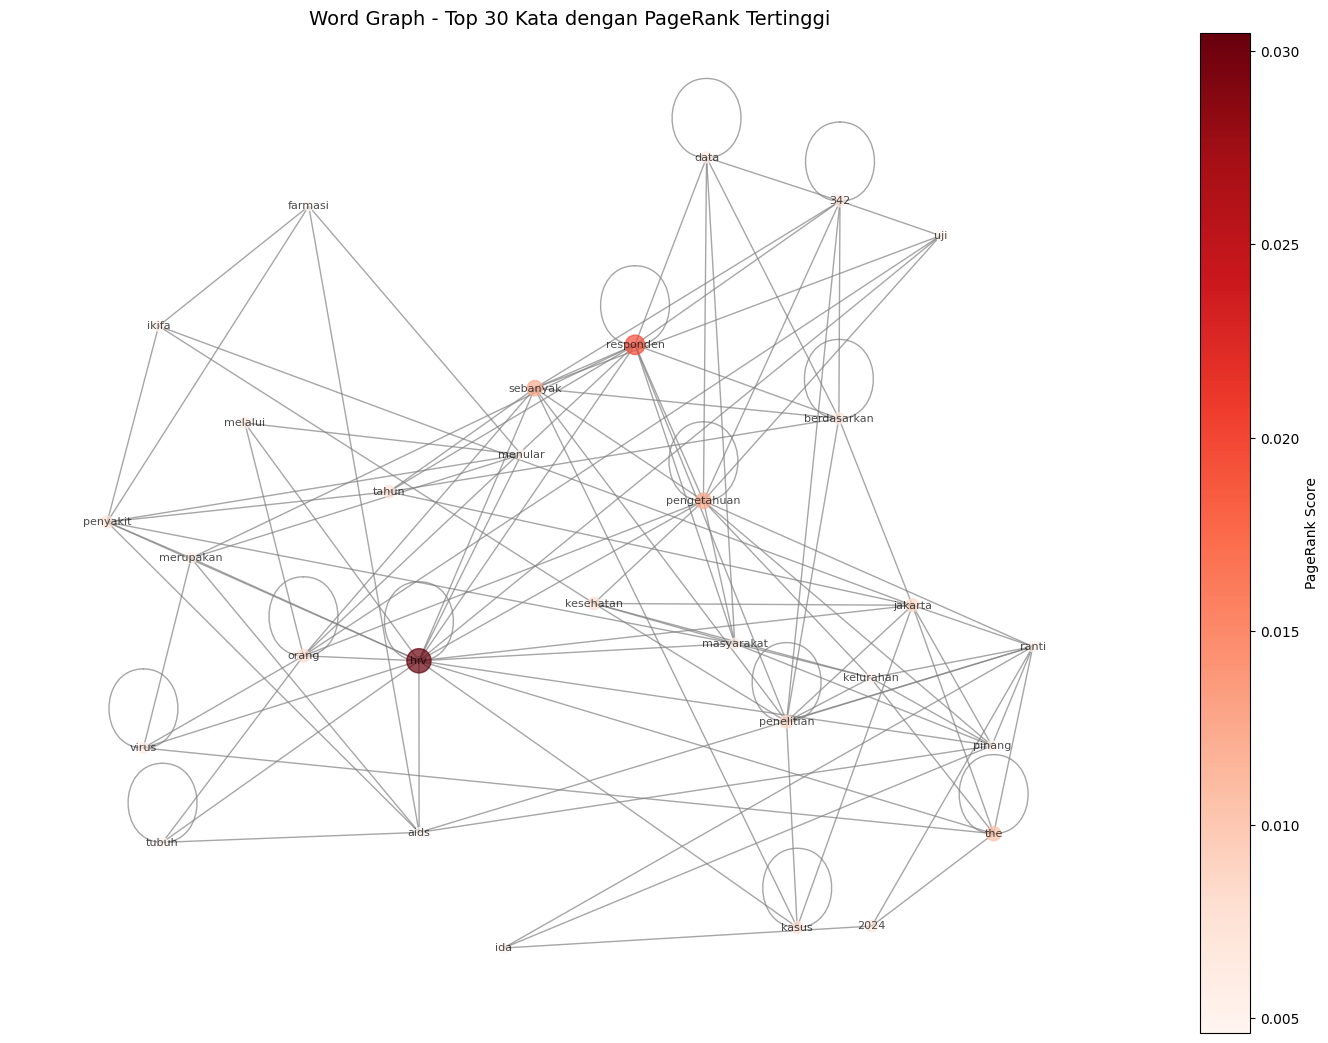

In [19]:
# Visualisasi graph dengan top 30 kata (untuk keterbacaan)
top_words = [word for word, score in sorted_pagerank[:30]]
subgraph = G.subgraph(top_words)

# Warna node berdasarkan PageRank score
node_colors = [pagerank_scores[node] for node in subgraph.nodes()]
node_sizes = [pagerank_scores[node] * 10000 for node in subgraph.nodes()]

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(subgraph, k=2, iterations=50)
nx.draw(subgraph, pos, 
        with_labels=True, 
        node_color=node_colors, 
        cmap=plt.cm.Reds,
        node_size=node_sizes, 
        font_size=8,
        edge_color='gray',
        alpha=0.7)
plt.title("Word Graph - Top 30 Kata dengan PageRank Tertinggi", fontsize=14)

# Fix colorbar dengan norm dan ax yang benar
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label='PageRank Score')

plt.tight_layout()
plt.show()